In [4]:
using PyPlot, Random, LinearAlgebra, Statistics, StatsBase, JLD
using PyCall
inset_locator = pyimport("mpl_toolkits.axes_grid1.inset_locator")

PyObject <module 'mpl_toolkits.axes_grid1.inset_locator' from '/Users/caro/.julia/conda/3/lib/python3.7/site-packages/mpl_toolkits/axes_grid1/inset_locator.py'>

In [5]:
include("../simulations/lozi-map.jl")
function mapslices_ith(f,A::Array{Ivl{T}}) where T
    fA = Array{T}(undef,2,size(A)...)
    for i in eachindex(A)
        fA[:,i...] = f(A[i]())
    end
    fA
end

mapslices_ith (generic function with 1 method)

In [23]:
stabledim = 0.2587
mtotalLRT = -0.175565486272132131030148248820175
stotalLRT = 0.00018379053299098158714468011037844;

In [7]:
@load "../simulations/Response.jld"
@load "../simulations/LargeResponse.jld"

3-element Vector{Symbol}:
 :large_epsv
 :large_rsp
 :p

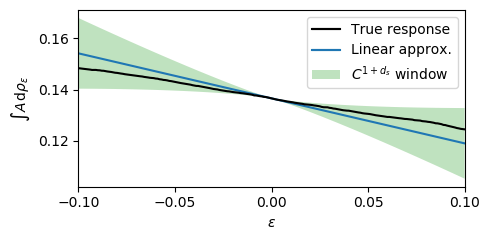

In [86]:
figure(1,figsize=(5,2.5))
large_zeroi = findall(large_epsv.==0)
predicted_response = mean(large_rsp[:,large_zeroi]) .+ mtotalLRT*large_epsv
linresp = errorbar(large_epsv,predicted_response,2hypot.(sem(large_rsp[:,large_zeroi]),large_epsv*stotalLRT))
trueresp = errorbar(large_epsv,vec(mean(large_rsp,dims=1)),2vec(mapslices(sem,large_rsp,dims=1)),c="k")
holderresp = fill_between(large_epsv,predicted_response-0.25abs.(large_epsv).^(1+stabledim),
                        predicted_response+0.25abs.(large_epsv).^(1+stabledim),alpha=0.3,fc="C2")

xlim(extrema(large_epsv)); xticks(-0.1:0.05:0.1)
xlabel("\$\\varepsilon\$"); ylabel("\$\\int A\\,\\mathrm{d}\\rho_\\varepsilon\$")
legend([trueresp,linresp,holderresp],["True response","Linear approx.","\$C^{1+d_s}\$ window"])
tight_layout()
savefig("../figures/Response.pdf")


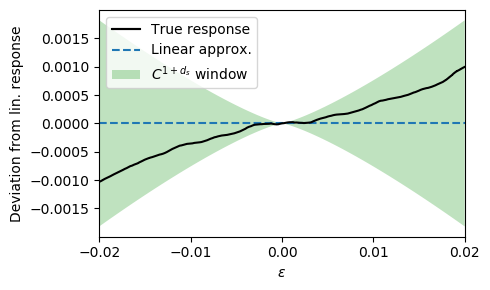

In [85]:
# littleaxes = inset_locator.inset_axes(gca(), width="50%", height="40%", loc=3)
figure(2,figsize=(5,3))
zeroi = findall(epsv.==0)
trueresp = errorbar(epsv,vec(mean(rsp,dims=1)) .- mean(rsp[:,zeroi]) .- (mtotalLRT)*epsv,
        2hypot.(sem(rsp[:,zeroi]),epsv*stotalLRT,vec(mapslices(sem,rsp,dims=1))),c="k")
linresp = plot(epsv,zeros(size(epsv)),"C0--")[1]
holderresp = fill_between(epsv,-0.25abs.(epsv).^(1+stabledim),0.25abs.(epsv).^(1+stabledim),alpha=0.3,fc="C2")
xlim(extrema(epsv)); xticks(-0.02:0.01:0.02)
legend((trueresp,linresp,holderresp),("True response","Linear approx.","\$C^{1+d_s}\$ window"))
xlabel("\$\\varepsilon\$"); ylabel("Deviation from lin. response")
tight_layout()
savefig("../figures/ResponseDeviation.pdf")
# ylim(-1e-4,1e-4); xlim(-1e-3,1e-3)
# gca().set_aspect("equal")

In [81]:
LRT = load("../simulations/DifferentSusceptibilities.jld")["LRT"]
mLRT = Float64.(vec(mean(sum(LRT[:,1:70,:],dims=2),dims=1))*p[2]./(p[2].+epsv))
sLRT = Float64.(vec(mapslices(sem,sum(LRT[:,1:70,:],dims=2),dims=1))*p[2]./(p[2].+epsv));

┌ Warning: JLD incorrectly extends FileIO functions (see FileIO documentation)
└ @ FileIO /Users/caro/.julia/packages/FileIO/JA3Vl/src/loadsave.jl:215


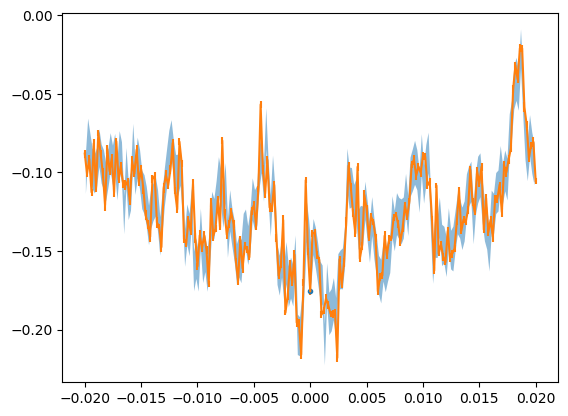

(PyObject <matplotlib.lines.Line2D object at 0x15fe23790>, (), (PyObject <matplotlib.collections.LineCollection object at 0x15fe41a90>,))

In [83]:
diffv = diff(vec(mean(rsp,dims=1)))./2e-4; diffvstd = sqrt(2)*vec(mapslices(sem,rsp,dims=1))[1:end-1]/2e-4
fill_between((epsv[1:end-1]+epsv[2:end])/2,diffv-2diffvstd,diffv+2diffvstd,alpha=0.5)
errorbar(0,mtotalLRT,2stotalLRT,marker=".")
errorbar(epsv,mLRT,2sLRT)
# xlim(-2e-3,2e-3)

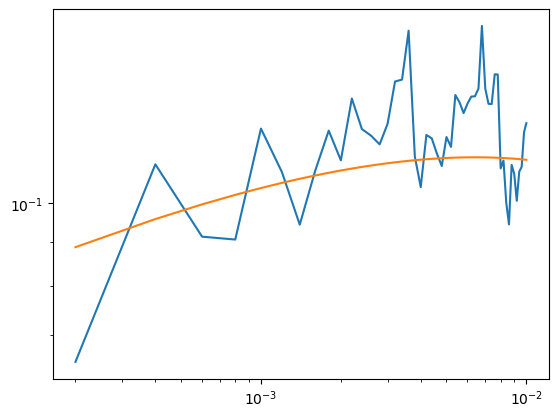

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x15d984c10>

In [108]:
loglog(Float64(epsv.step)*(1:50),[maximum(abs.(mLRT[1:end-i]-mLRT[1+i:end])) for i = 1:50])
plot(Float64(epsv.step)*(1:50),(x->1e-1x^0.25 * log(p[2]/x)).(Float64(epsv.step)*(1:50)))

In [119]:
sum(mLRT[1:end-1])*0.0002, mean(rsp[:,end]-rsp[:,1]) # integrating works :)

(-0.005013212160963404, -0.004996331166596495)

In [ ]:
mtotalLRT[end]-mtotalLRT[1]